___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [112]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [113]:
x_train.shape

(60000, 28, 28)

In [114]:
x_test.shape

(10000, 28, 28)

In [115]:
x_train[15, 15]

array([  0,   0,   0,   0,   0,   0,   0,   0,  78, 216, 255, 208, 205,
       214, 197, 202, 214, 211, 210, 213, 211, 208, 214, 204, 208, 207,
       237, 136], dtype=uint8)

In [116]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [117]:
y_train[15]

9

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [118]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

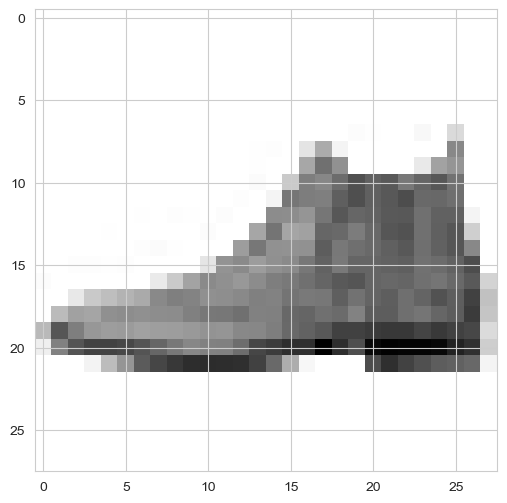

In [119]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [120]:
y_test[0]

9

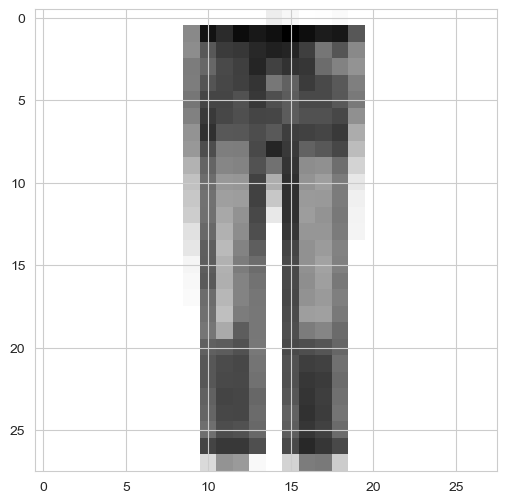

In [121]:
plt.imshow(x_test[15].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [122]:
y_test[15]

1

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [123]:
x_train.max()

255.0

In [124]:
x_test.max()

255.0

In [125]:
x_train = x_train / 255
x_test = x_test / 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [126]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)

In [127]:
x_train.shape

(60000, 28, 28, 1)

In [128]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [129]:
import keras
import tensorflow as tf

In [130]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [131]:
y_train_one_hot.shape

(60000, 10)

In [132]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [134]:
from tensorflow.keras.layers import Conv2D

In [135]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [136]:
from tensorflow.keras.layers import Flatten

In [137]:
from tensorflow.keras.layers import Dense

In [138]:
from tensorflow.keras.layers import Activation

In [139]:
model = keras.Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 64)       

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [141]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [101]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [143]:
#model training
model.fit(x_train, y_train_one_hot, batch_size = 64, epochs=10, validation_data=(x_test,y_test_one_hot),callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 32s 34ms/step - loss: 0.6324 - accuracy: 0.7671 - val_loss: 0.4878 - val_accuracy: 0.8177
Epoch 2/10
938/938 [==============================] - 31s 33ms/step - loss: 0.4172 - accuracy: 0.8465 - val_loss: 0.4035 - val_accuracy: 0.8540
Epoch 3/10
938/938 [==============================] - 32s 34ms/step - loss: 0.3600 - accuracy: 0.8682 - val_loss: 0.3620 - val_accuracy: 0.8674
Epoch 4/10
938/938 [==============================] - 33s 35ms/step - loss: 0.3238 - accuracy: 0.8792 - val_loss: 0.3474 - val_accuracy: 0.8727
Epoch 5/10
938/938 [==============================] - 30s 31ms/step - loss: 0.2950 - accuracy: 0.8905 - val_loss: 0.3311 - val_accuracy: 0.8774
Epoch 6/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2739 - accuracy: 0.8975 - val_loss: 0.3267 - val_accuracy: 0.8816
Epoch 7/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2520 - accuracy: 0.9065 - val_loss: 0.3124 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

In [144]:
model.metrics_names

['loss', 'accuracy']

In [145]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.632,0.767,0.488,0.818
1,0.417,0.846,0.404,0.854
2,0.360,0.868,0.362,0.867
3,0.324,0.879,0.347,0.873
4,0.295,0.890,0.331,0.877


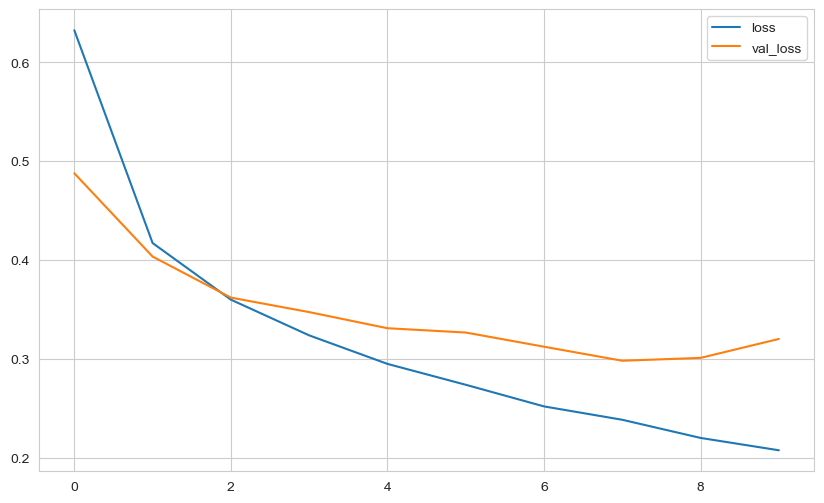

In [146]:
summary[["loss", "val_loss"]].plot();

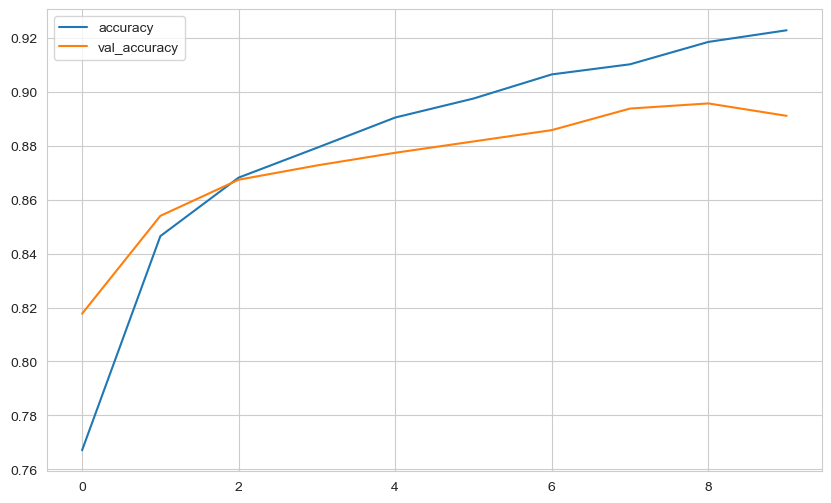

In [147]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.2982 - accuracy: 0.8938


[0.2981659173965454, 0.8938000202178955]

In [150]:
score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])   
print('Test accuracy:', score[1]) 

Test loss: 0.2981659173965454
Test accuracy: 0.8938000202178955


In [151]:
pred_prob = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [152]:
y_pred = np.argmax(pred_prob, axis=1)

In [153]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.90      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.66      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [156]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [157]:
print(confusion_matrix(y_test, y_pred)) 

[[842   1  30  25   3   2  89   0   8   0]
 [  3 971   0  16   4   0   4   0   2   0]
 [ 16   1 865   9  49   0  54   0   6   0]
 [  8   8  18 900  27   0  34   0   4   1]
 [  0   0  57  19 826   0  92   0   6   0]
 [  0   0   0   2   0 967   0  21   1   9]
 [122   0  87  27  84   0 662   0  18   0]
 [  0   0   0   0   0   9   0 971   0  20]
 [  1   0   1   3   4   3   4   2 981   1]
 [  1   0   1   0   0   5   0  40   0 953]]


<AxesSubplot:>

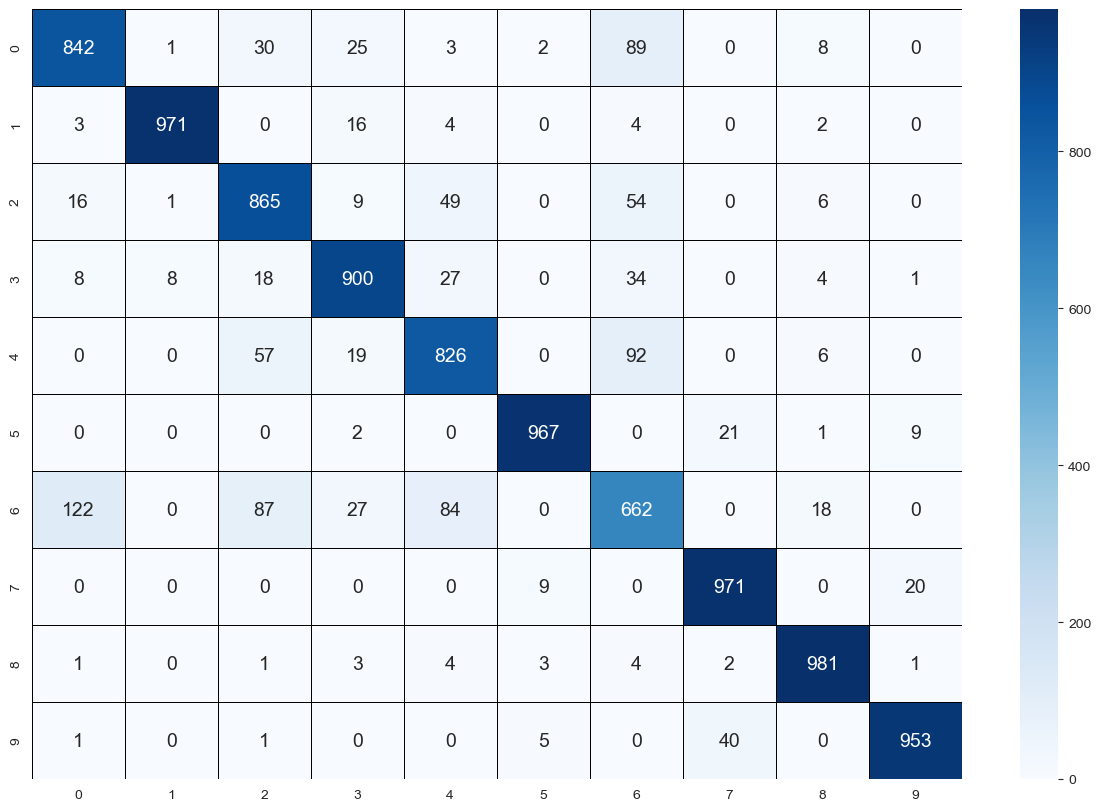

In [158]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [162]:
my_image = x_test[15]

In [163]:
my_image.shape

(28, 28, 1)

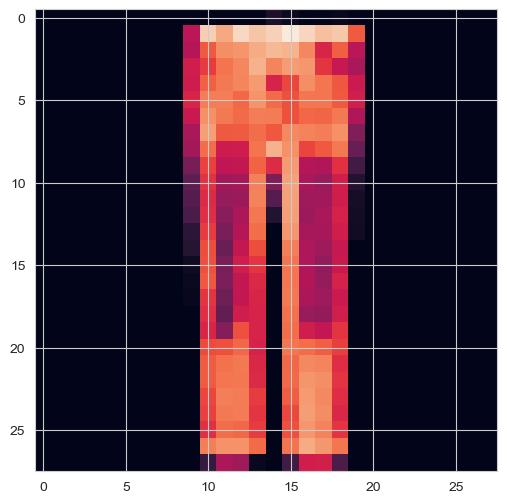

In [164]:
plt.imshow(my_image)

In [166]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 29ms/step


In [167]:
image_prediction

array([[4.39505220e-06, 9.99977469e-01, 6.59792761e-07, 5.46483489e-06,
        8.81183041e-06, 1.23863311e-08, 3.17948252e-06, 1.52346483e-10,
        1.26831114e-08, 5.77951509e-09]], dtype=float32)

In [168]:
np.argmax(image_prediction, axis=1)

array([1], dtype=int64)

In [169]:
result=np.argmax(image_prediction, axis=1)

In [170]:
result

array([1], dtype=int64)

In [171]:
classes[int(result)]

'Trouser'

In [ ]:
#model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___